In [1]:
SAVED_RESULTS_DIR = "./out"

# Import funman related code
import os
from funman.api.run import Runner
from funman_demo import summarize_results
from funman_demo.example.pde import plot_spatial_timeseries
from IPython.display import HTML
import matplotlib.pyplot as plt
import itertools
from funman import FunmanWorkRequest, EncodingSchedule, POS_INFINITY

import json
from funman.representation.constraint import LinearConstraint, ParameterConstraint, StateVariableConstraint
from funman.representation import Interval
from funman import FUNMANConfig
import logging
from funman_demo import summarize_results



RESOURCES = "../../../resources"

EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet", "evaluation")
EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet", "evaluation")
MODEL_PATH = os.path.join(
    EXAMPLE_DIR,"sir.json"
)


[0.15000, 0.15000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.02500, 0.02500) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.99000, 0.99000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01000, 0.01000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.00000, 0.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[1.00000, 1.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[12.00000, 12.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[12.00000, 12.00000) has equal lower and upper bounds, so assuming the upper boun

Total # of ibex-fwdbwd Pruning                @ Pruning level        =           19034
Total # of ibex-fwdbwd Pruning (zero-effect)  @ Pruning level        =           13697
Total time spent in Pruning                   @ Pruning level        =        0.018109 sec
Total time spent in making constraints        @ Pruning level        =        0.000000 sec
Total # of Convert                            @ Ibex Converter       =             307
Total time spent in Converting                @ Ibex Converter       =        0.002069 sec


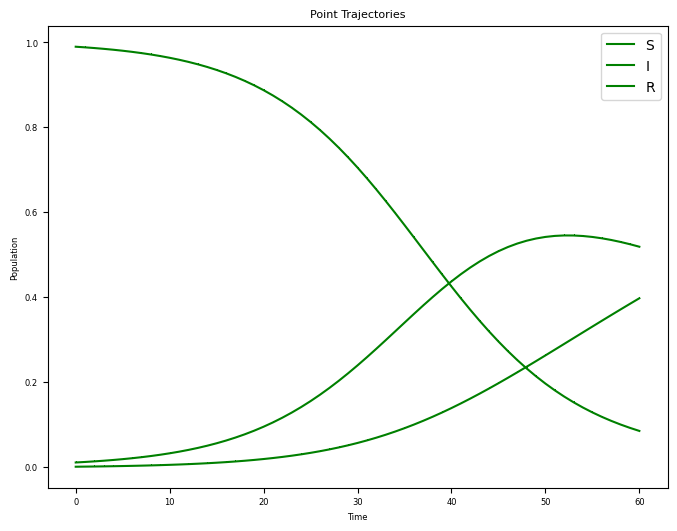

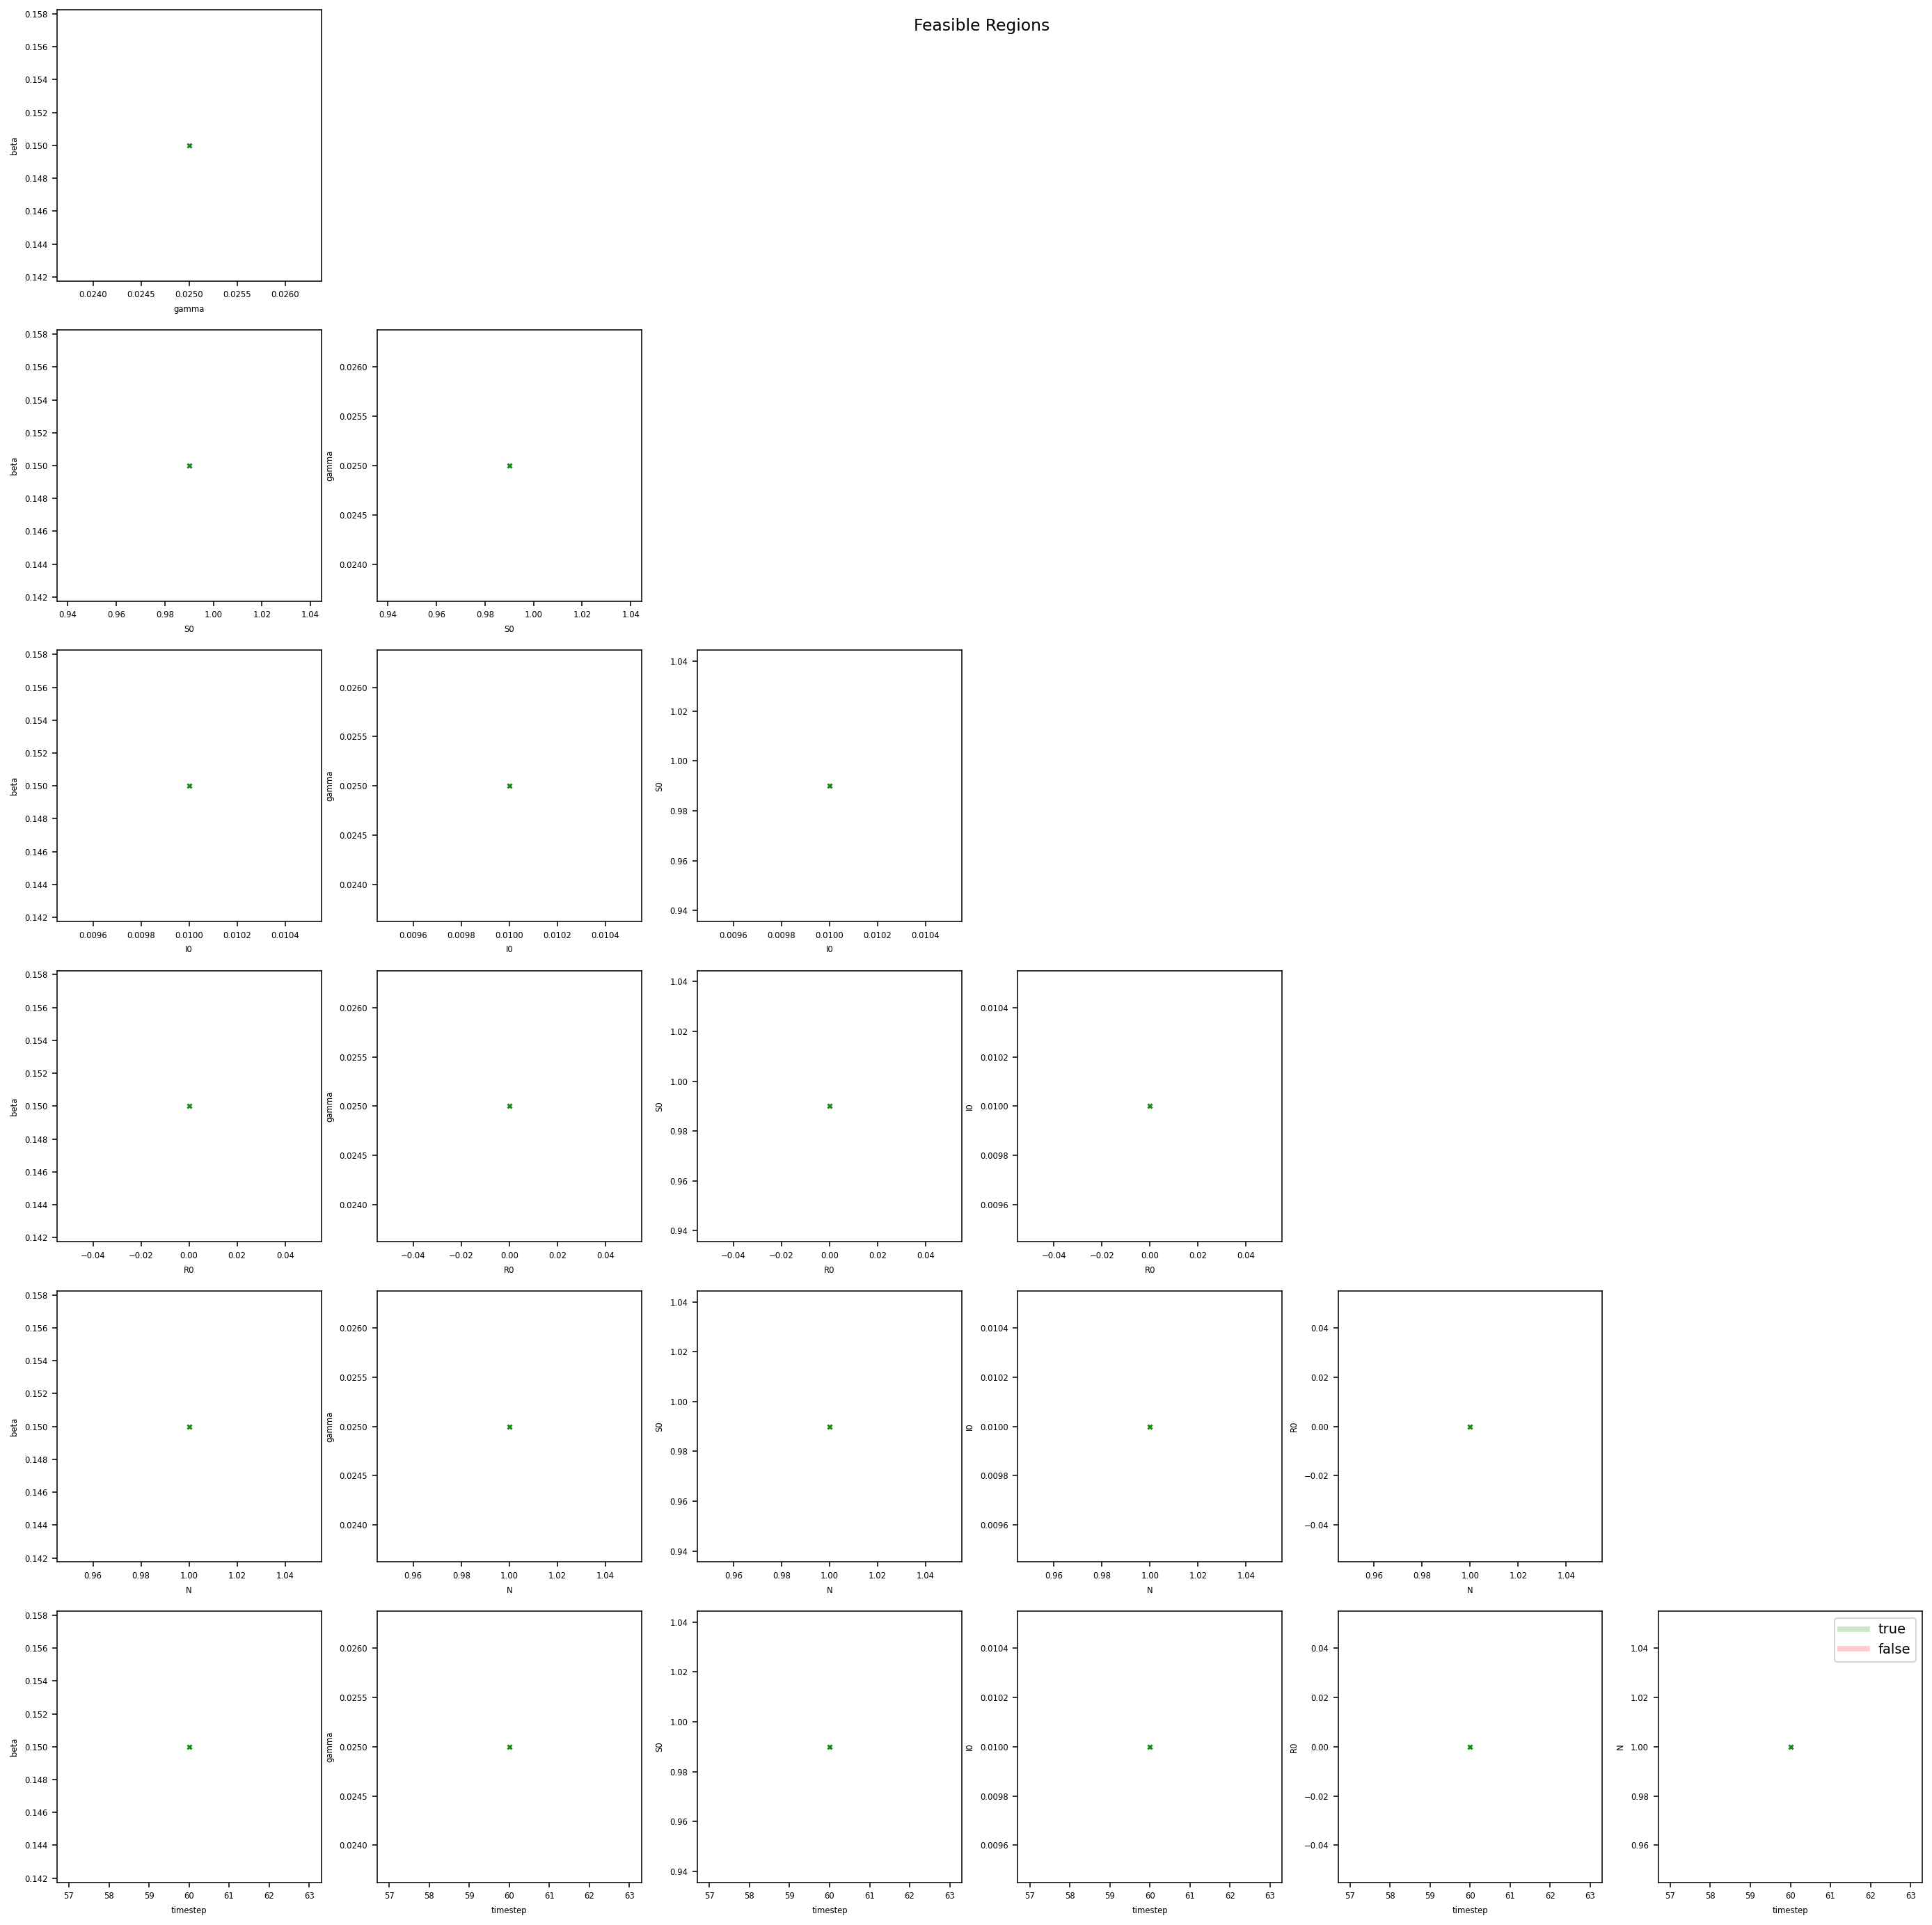

********************************************************************************
********************************************************************************
* Analysis Summary
********************************************************************************
1 Points (+:1, -:0), 1 Boxes (+:1, -:0)
Parameters = {beta[0.15000000000000002, 0.15000000000000002): 0.15000000000000002, gamma[0.025, 0.025): 0.025, S0[0.9900000000000001, 0.9900000000000001): 0.9900000000000001, I0[0.01, 0.01): 0.01, R0[0.0, 0.0): 0.0, N[1.0, 1.0): 1.0}
        # {beta[0.15000000000000002, 0.15000000000000002): 0.15000000000000002, gamma[0.025, 0.025): 0.025, S0[0.9900000000000001, 0.9900000000000001): 0.9900000000000001, I0[0.01, 0.01): 0.01, R0[0.0, 0.0): 0.0, N[1.0, 1.0): 1.0}
                     I    I0    N         R   R0         S    S0  beta  gamma  id  \
time                                                                        
0.0   0.010000  0.01  1.0  0.000000  0.0  0.990000  0.99  0.15  0.025  

In [9]:
# Consistency

STATES = ["S", "I", "R"]
COMPARTMENTS = STATES
MAX_TIME=60
STEP_SIZE=1
to_synthesize=[]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sir_request_consistency.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIR Consistency",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", synthesized_parameters=to_synthesize+["timestep"])
    print(summary)

[0.99000, 0.99000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01000, 0.01000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.00000, 0.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[1.00000, 1.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[30.00000, 30.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[30.00000, 30.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[2.00000, 2.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[2.00000, 2.00000) has equal lower and upper bounds, so assuming the upper boun

Total # of ibex-fwdbwd Pruning                @ Pruning level        =          149047
Total # of ibex-fwdbwd Pruning (zero-effect)  @ Pruning level        =           60995
Total time spent in Pruning                   @ Pruning level        =        0.153228 sec
Total time spent in making constraints        @ Pruning level        =        0.000000 sec
Total # of Convert                            @ Ibex Converter       =             307
Total time spent in Converting                @ Ibex Converter       =        0.002349 sec


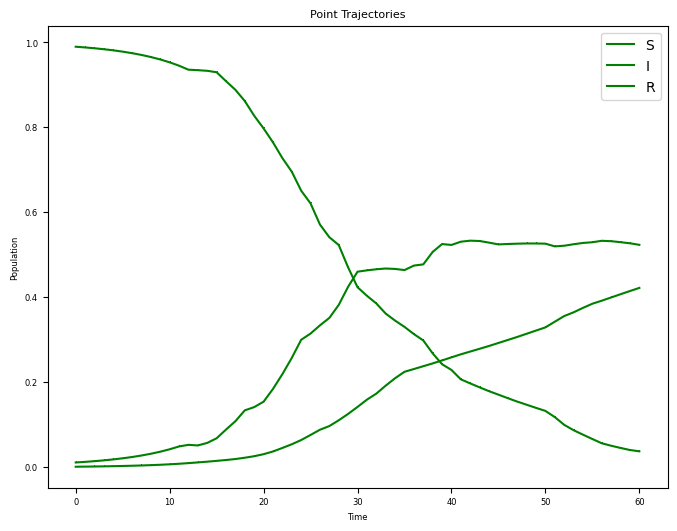

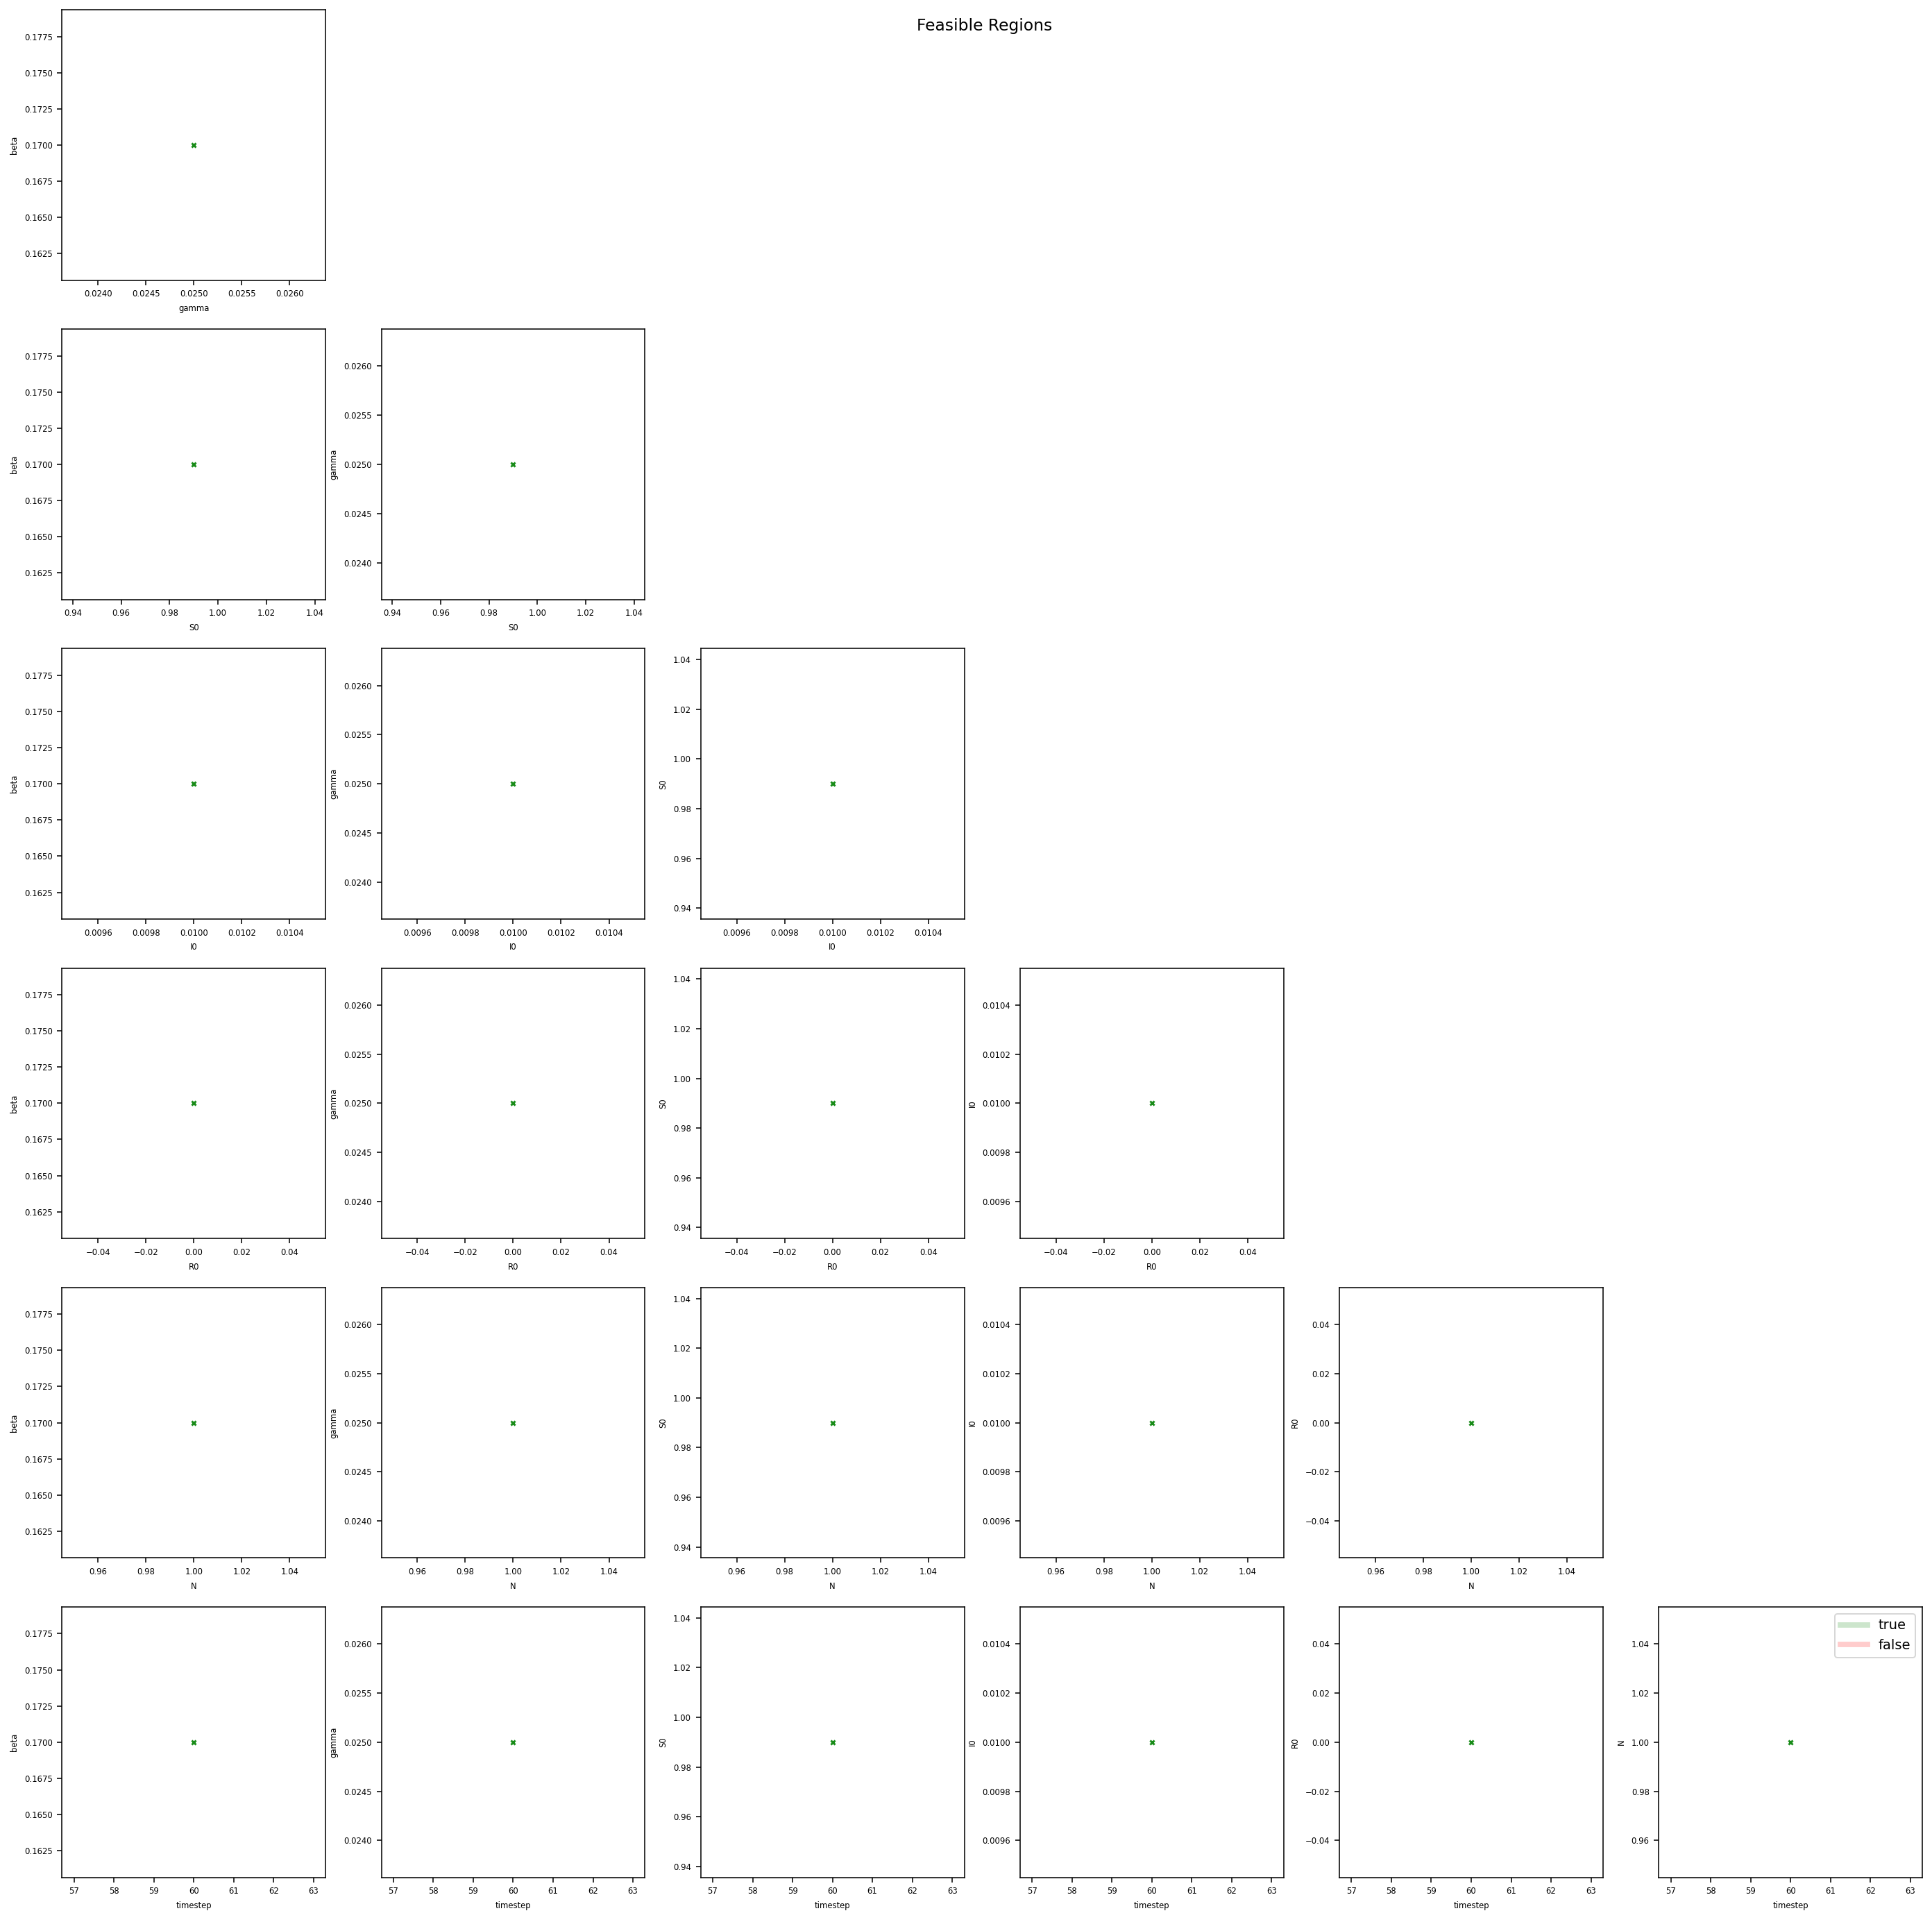

********************************************************************************
********************************************************************************
* Analysis Summary
********************************************************************************
1 Points (+:1, -:0), 1 Boxes (+:1, -:0)
Parameters = {beta[0.12000000000000001, 0.22): 0.16999999999999998, gamma[0.015000000000000001, 0.035): 0.025, S0[0.9900000000000001, 0.9900000000000001): 0.9900000000000001, I0[0.01, 0.01): 0.01, R0[0.0, 0.0): 0.0, N[1.0, 1.0): 1.0}
        # {beta[0.12000000000000001, 0.22): 0.16999999999999998, gamma[0.015000000000000001, 0.035): 0.025, S0[0.9900000000000001, 0.9900000000000001): 0.9900000000000001, I0[0.01, 0.01): 0.01, R0[0.0, 0.0): 0.0, N[1.0, 1.0): 1.0}
                     I    I0    N         R   R0         S    S0  beta  gamma  id  \
time                                                                        
0.0   0.010000  0.01  1.0  0.000000  0.0  0.990000  0.99  0.17  0.025  

In [13]:
# Parameterization

STATES = ["S", "I", "R"]
COMPARTMENTS = STATES
MAX_TIME=60
STEP_SIZE=1
to_synthesize=[]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sir_request_parameterization.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIR Consistency",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", synthesized_parameters=to_synthesize+["timestep"])
    print(summary)

[0.99000, 0.99000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01000, 0.01000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.00000, 0.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[1.00000, 1.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
Automatic initialization of gaol... done
[11.00000, 11.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[11.00000, 11.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[5.00000, 5.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[5.00000, 5.00000) has equal lower and

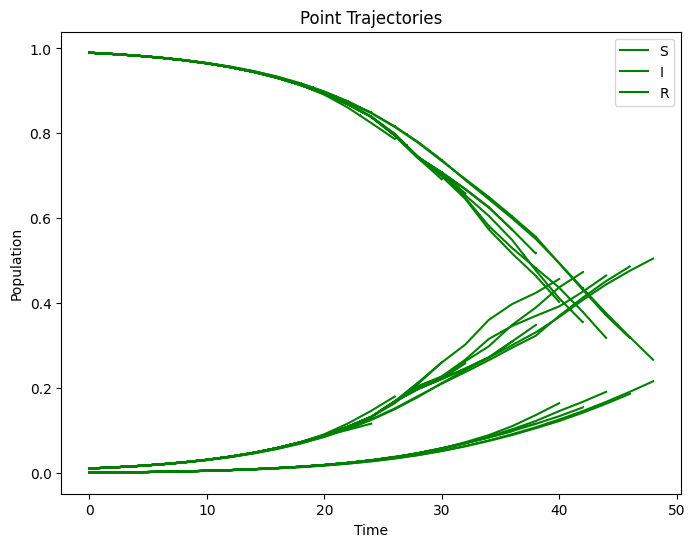

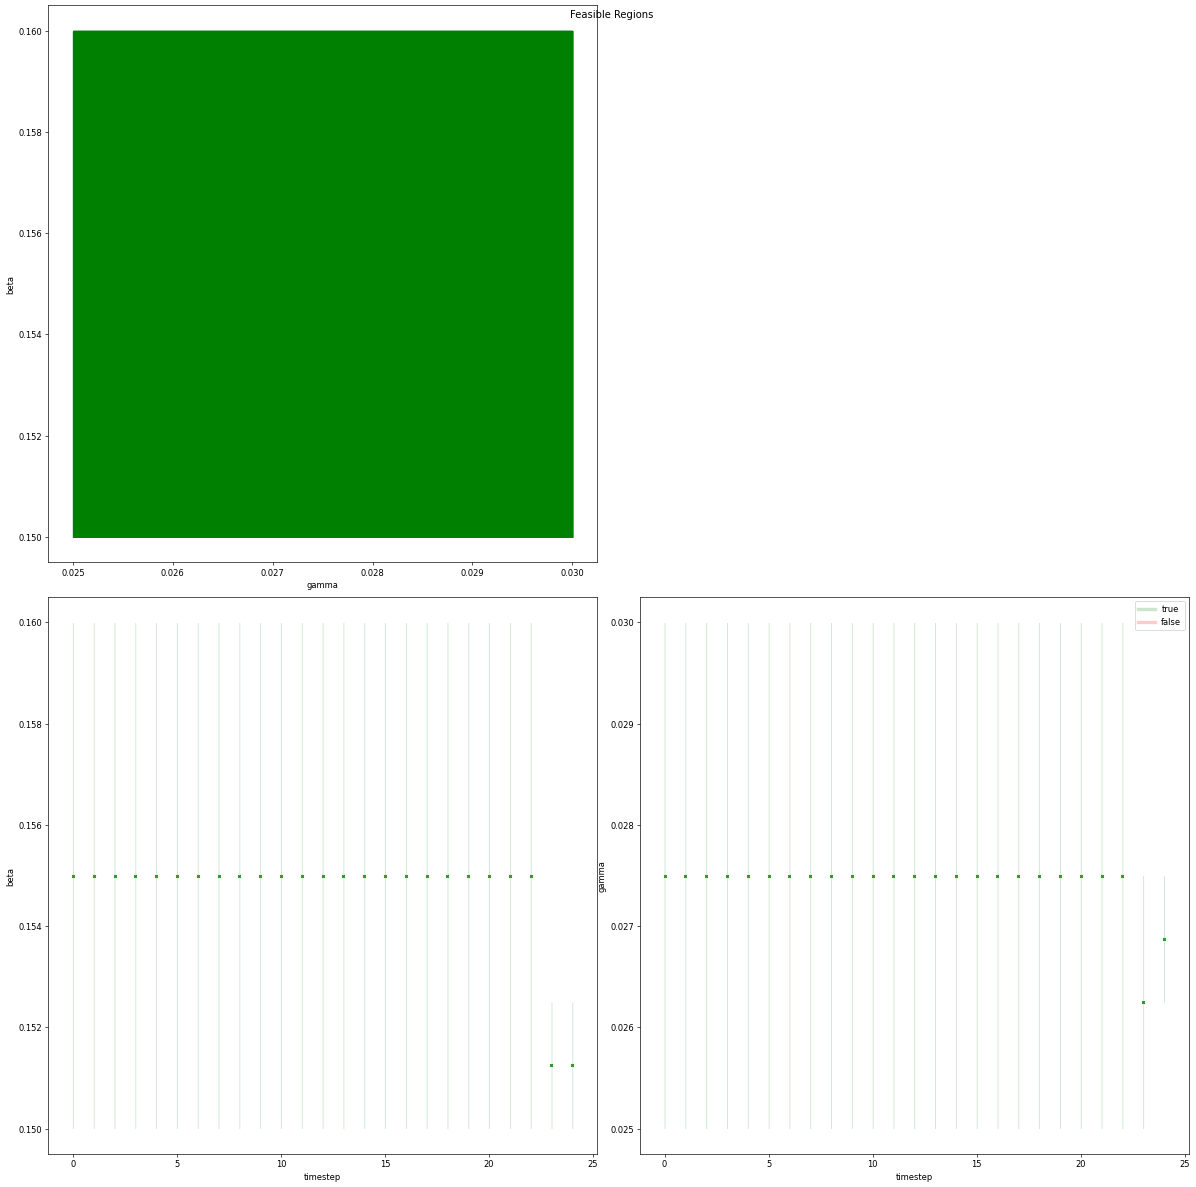

********************************************************************************
********************************************************************************
* Analysis Summary
********************************************************************************
25 Points (+:25, -:0), 25 Boxes (+:25, -:0)
Parameters = {beta[0.15, 0.16): 0.15499999999999997, gamma[0.025, 0.03): 0.027499999999999997, S0[0.99, 0.99): 0.99, I0[0.01, 0.01): 0.01, R0[0.0, 0.0): 0.0, N[1.0, 1.0): 1.0}
        # {beta[0.15, 0.16): 0.15499999999999997, gamma[0.025, 0.03): 0.027499999999999997, S0[0.99, 0.99): 0.99, I0[0.01, 0.01): 0.01, R0[0.0, 0.0): 0.0, N[1.0, 1.0): 1.0}
                     I    I0    N         R   R0         S    S0   beta   gamma  id  \
time                                                                          
0.0   0.010000  0.01  1.0  0.000000  0.0  0.990000  0.99  0.155  0.0275   0   
1.0   0.011260  0.01  1.0  0.000275  0.0  0.988465  0.99  0.155  0.0275   0   
2.0   0.012519  0.01 

In [2]:
# Parameter Synthesis

STATES = ["S", "I", "R"]
COMPARTMENTS = STATES
MAX_TIME=60
STEP_SIZE=2
to_synthesize=["beta", "gamma"]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sir_request_param_synth.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    funman_request.parameter("gamma").interval.lb = 0.025
    funman_request.parameter("gamma").interval.ub = 0.03
    funman_request.parameter("beta").interval.lb = 0.15
    funman_request.parameter("beta").interval.ub = 0.16
    # funman_request.config.substitute_subformulas = True
    # funman_request.config.taylor_series_order = 4
    # series_approximation_threshold = 1e-8
    funman_request.config.verbosity = 20
    funman_request.config.tolerance = 1e-1
    funman_request.config.uniform_box_splits = True
    funman_request.config.num_initial_boxes = 1

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIR Consistency",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", parameters_to_plot=to_synthesize+["timestep"], synthesized_parameters=to_synthesize+["timestep"])
    print(summary)